This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray IRIS backend

In this example, we read IRIS (sigmet) data files using the xradar `iris` xarray backend.

In [1]:
import glob
import gzip
import io
import wradlib as wrl
import wradlib_data
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xradar as xd
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load IRIS Volume Data

In [2]:
fpath = "sigmet/SUR210819000227.RAWKPJV"
f = wradlib_data.DATASETS.fetch(fpath)
vol = xd.io.open_iris_datatree(f, reindex_angle=False)

## Inspect RadarVolume

In [3]:
display(vol)

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 1)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2021-08-19T00:02:28Z'
│       time_coverage_end    <U20 80B '2021-08-19T00:02:49Z'
│       longitude            float64 8B 25.52
│       altitude             float64 8B 157.0
│       latitude             float64 8B 58.48
│       sweep_group_name     (sweep) int64 8B 0
│       sweep_fixed_angle    (sweep) float64 8B 0.5
│   Attributes:
│       Conventions:      None
│       instrument_name:  Surgavere, Radar
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           Sigmet
│       history:          None
│       comment:          Dual pol 250km hybrid surveillance task 0.5 deg 2.5minu...
│       scan_name:        PPI1_H      
├── Group: /sweep_0
│       Dimensions:            (azimuth: 359, range: 833)
│       Coordinates:
│         * azimuth            (azimuth) float32 1kB 0.03021 1.035 2.054 ... 358.0 359.0
│           elevation          (azimuth) float32 1kB ...
│           time               (azimuth) datetime64[ns] 3kB 2021-08-19T00:02:31.10400...
│         * range              (range) float32 3kB 150.0 450.0 ... 2.494e+05 2.498e+05
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│       Data variables: (12/16)
│           DBTH               (azimuth, range) float32 1MB ...
│           DBZH               (azimuth, range) float32 1MB ...
│           VRADH              (azimuth, range) float32 1MB ...
│           WRADH              (azimuth, range) float32 1MB ...
│           ZDR                (azimuth, range) float32 1MB ...
│           KDP                (azimuth, range) float32 1MB ...
│           ...                 ...
│           SNRH               (azimuth, range) float32 1MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /radar_parameters
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
├── Group: /georeferencing_correction
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
└── Group: /radar_calibration

## Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [4]:
vol.root

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 1)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2021-08-19T00:02:28Z'
│       time_coverage_end    <U20 80B '2021-08-19T00:02:49Z'
│       longitude            float64 8B 25.52
│       altitude             float64 8B 157.0
│       latitude             float64 8B 58.48
│       sweep_group_name     (sweep) int64 8B 0
│       sweep_fixed_angle    (sweep) float64 8B 0.5
│   Attributes:
│       Conventions:      None
│       instrument_name:  Surgavere, Radar
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           Sigmet
│       history:          None
│       comment:          Dual pol 250km hybrid surveillance task 0.5 deg 2.5minu...
│       scan_name:        PPI1_H      
├── Group: /sweep_0
│       Dimensions:            (azimuth: 359, range: 833)
│       Coordinates:
│         * azimuth            (azimuth) float32 1kB 0.03021 1.035 2.054 ... 358.0 359.0
│           elevation          (azimuth) float32 1kB ...
│           time               (azimuth) datetime64[ns] 3kB 2021-08-19T00:02:31.10400...
│         * range              (range) float32 3kB 150.0 450.0 ... 2.494e+05 2.498e+05
│           longitude          float64 8B ...
│           latitude           float64 8B ...
│           altitude           float64 8B ...
│       Data variables: (12/16)
│           DBTH               (azimuth, range) float32 1MB ...
│           DBZH               (azimuth, range) float32 1MB ...
│           VRADH              (azimuth, range) float32 1MB ...
│           WRADH              (azimuth, range) float32 1MB ...
│           ZDR                (azimuth, range) float32 1MB ...
│           KDP                (azimuth, range) float32 1MB ...
│           ...                 ...
│           SNRH               (azimuth, range) float32 1MB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float64 8B ...
├── Group: /radar_parameters
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
├── Group: /georeferencing_correction
│       Dimensions:    ()
│       Coordinates:
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│           altitude   float64 8B ...
└── Group: /radar_calibration

## Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [5]:
display(vol["sweep_0"])

<xarray.DataTree 'sweep_0'>
Group: /sweep_0
    Dimensions:            (sweep: 1, azimuth: 359, range: 833)
    Coordinates:
      * azimuth            (azimuth) float32 1kB 0.03021 1.035 2.054 ... 358.0 359.0
        elevation          (azimuth) float32 1kB ...
        time               (azimuth) datetime64[ns] 3kB 2021-08-19T00:02:31.10400...
      * range              (range) float32 3kB 150.0 450.0 ... 2.494e+05 2.498e+05
        longitude          float64 8B ...
        latitude           float64 8B ...
        altitude           float64 8B ...
    Dimensions without coordinates: sweep
    Data variables: (12/16)
        DBTH               (azimuth, range) float32 1MB ...
        DBZH               (azimuth, range) float32 1MB ...
        VRADH              (azimuth, range) float32 1MB ...
        WRADH              (azimuth, range) float32 1MB ...
        ZDR                (azimuth, range) float32 1MB ...
        KDP                (azimuth, range) float32 1MB ...
        ...                 ...
        SNRH               (azimuth, range) float32 1MB ...
        sweep_mode         <U20 80B ...
        sweep_number       int64 8B ...
        prt_mode           <U7 28B ...
        follow_mode        <U7 28B ...
        sweep_fixed_angle  float64 8B ...

## Georeferencing

In [6]:
swp = vol["sweep_0"].ds.copy()
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)
swp = swp.wrl.georef.georeference()

## Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset.

In [7]:
display(swp.DBZH)

<xarray.DataArray 'DBZH' (azimuth: 359, range: 833)> Size: 1MB
[299047 values with dtype=float32]
Coordinates: (12/15)
    sweep_mode  <U20 80B 'azimuth_surveillance'
  * azimuth     (azimuth) float32 1kB 0.03021 1.035 2.054 ... 357.0 358.0 359.0
    elevation   (azimuth) float64 3kB 0.5054 0.5054 0.5054 ... 0.5054 0.5054
    time        (azimuth) datetime64[ns] 3kB 2021-08-19T00:02:31.104000 ... 2...
  * range       (range) float32 3kB 150.0 450.0 750.0 ... 2.494e+05 2.498e+05
    longitude   float64 8B 25.52
    ...          ...
    y           (azimuth, range) float64 2MB 150.0 450.0 ... 2.493e+05 2.496e+05
    z           (azimuth, range) float64 2MB 158.3 161.0 ... 6.023e+03 6.034e+03
    gr          (azimuth, range) float64 2MB 150.0 450.0 ... 2.493e+05 2.496e+05
    rays        (azimuth, range) float32 1MB 0.03021 0.03021 ... 359.0 359.0
    bins        (azimuth, range) float32 1MB 150.0 450.0 ... 2.494e+05 2.498e+05
    crs_wkt     int64 8B 0
Attributes:
    long_name:      Equivalent reflectivity factor H
    units:          dBZ
    standard_name:  radar_equivalent_reflectivity_factor_h

## Create simple plot

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

For more details on plotting radar data see under [Visualization](../../plotting.ipynb).

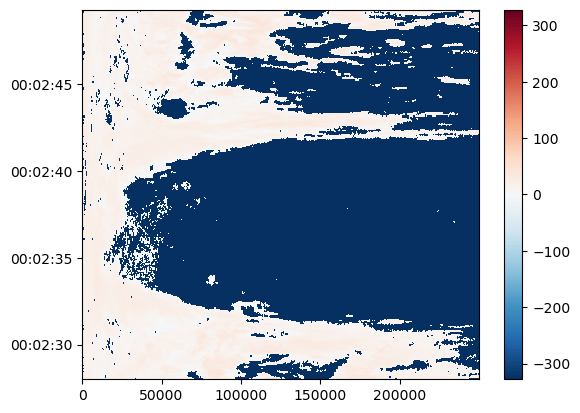

In [8]:
swp.DBZH.sortby("time").plot(x="range", y="time", add_labels=False)

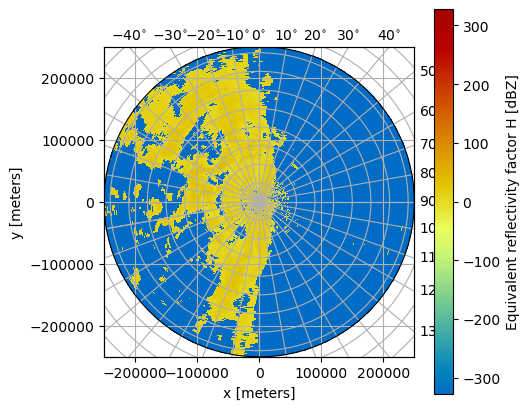

In [9]:
fig = plt.figure(figsize=(5, 5))
pm = swp.DBZH.wrl.vis.plot(crs={"latmin": 3e3}, fig=fig)

## Retrieve explicit group

In [10]:
swp_b = xr.open_dataset(
    f, engine="iris", group="sweep_0", backend_kwargs=dict(reindex_angle=False)
)
display(swp_b)

<xarray.Dataset> Size: 13MB
Dimensions:            (azimuth: 359, range: 833)
Coordinates:
  * azimuth            (azimuth) float32 1kB 0.03021 1.035 2.054 ... 358.0 359.0
    elevation          (azimuth) float32 1kB ...
    time               (azimuth) datetime64[ns] 3kB ...
  * range              (range) float32 3kB 150.0 450.0 ... 2.494e+05 2.498e+05
    longitude          float64 8B ...
    latitude           float64 8B ...
    altitude           float64 8B ...
Data variables: (12/16)
    DBTH               (azimuth, range) float32 1MB ...
    DBZH               (azimuth, range) float32 1MB ...
    VRADH              (azimuth, range) float32 1MB ...
    WRADH              (azimuth, range) float32 1MB ...
    ZDR                (azimuth, range) float32 1MB ...
    KDP                (azimuth, range) float32 1MB ...
    ...                 ...
    SNRH               (azimuth, range) float32 1MB ...
    sweep_mode         <U20 80B ...
    sweep_number       int64 8B ...
    prt_mode           <U7 28B ...
    follow_mode        <U7 28B ...
    sweep_fixed_angle  float64 8B ...
Attributes:
    source:           Sigmet
    scan_name:        PPI1_H      
    instrument_name:  Surgavere, Radar
    comment:          Dual pol 250km hybrid surveillance task 0.5 deg 2.5minu...